# NLP Project Round 1 - Team INK

Steps Involved :


1.   Importing Libraries
2.   Importing Corpus
3.   Text Preprocessing  
    3.1 Removing Weblinks  
    3.2 Removing Chapter Numbers   
    3.3 Removing Numbers  
    3.4 Converting to Lowercase  
    3.5 Removing WhiteSpace  
    3.6 Sentence Tokenization  
    3.7 Word Tokenization  
    3.8 Initial Frequency Distribution  
    3.9 Removing Punctuations  
    3.10 Lemmatization  
    3.11 Stemming  
    3.12 Final Frequency Dustribution and plotting  
    3.13 Removing Stopwords  
4.   Word Cloud Analysis
5.   POS Tagging



In [1]:
#pip install --upgrade plotly

## 1.Importing Libraries

In [2]:
import nltk
import pandas as pd
from urllib import request
import re
import plotly.express as px

## 2.Importing Corpus T1 and T2

In [3]:
t1 = open("T1.txt","r")         #http://www.gutenberg.org/files/98/98-0.txt
t1 = t1.read()
t2 = open("T2.txt","r")         #http://www.gutenberg.org/files/120/120-0.txt
t2 = t2.read()

In [4]:
#t1.read()
#t1.encoding
print(type(t1))
print(len(t1))

<class 'str'>
776697


In [5]:
#t2.read()
#t2.encoding
print(type(t2))
print(len(t2))

<class 'str'>
383717


## 3. Text Preprocessing

### 3.1 Removing WebLinks

In [6]:
#removing weblinks
t1=re.sub(r'http\S+', '',t1)
t2=re.sub(r'http\S+', '',t2)
#print(t2)

### 3.2 Removing Chapter Number

In [7]:
#removing chapter no
t1 = re.sub(r'Chapter [A-Z]+', '', t1)
t2 = re.sub(r'Chapter [A-Z]+', '', t2)

### 3.3 Removing Numbers

In [8]:
#removing numbers
t1 = re.sub(r'\d+', '', t1)
t2 = re.sub(r'\d+', '', t2)

### 3.4 Converting to Lowercase

In [9]:
#Converting to Lowercase
t1 = t1.lower()
t2 = t2.lower()

### 3.5 Removing WhiteSpaces

In [10]:
#removing witespaces
t1 = " ".join(t1.split()) 
t2 = " ".join(t2.split()) 

### 3.6 Sentence Tokenization

In [11]:
# Sentence Tokenize
from nltk import sent_tokenize
nltk.download('punkt')

sentences_1 = sent_tokenize(t1)
print(len(sentences_1))
#for sen in sentences_1 :
 #   print(sen)

[nltk_data] Downloading package punkt to /Users/ishita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


5780


In [12]:
# Sentence Tokenize
from nltk import sent_tokenize

sentences_2 = sent_tokenize(t2)
print(len(sentences_2))
#for sen in sentences_2 :
 #   print(sen)

3518


### 3.7 Word Tokenization

In [13]:
#Word Tokenization
from nltk import word_tokenize

words_1= word_tokenize(t1)
print(len(words_1))
#for w in words_1 :
 #   print(w)

168885


In [14]:
#Word Tokenization
from nltk import word_tokenize

words_2 = word_tokenize(t2)
print(len(words_2))
#for w in words_2 :
 #   print(w)

87244


### 3.8 Initial Frequency Distribution

In [15]:
#Frequency Distribution
from nltk.probability import FreqDist
fdist_1_o = FreqDist(words_1)
fdist_1_o.most_common(25)

[(',', 13274),
 ('the', 8226),
 ('.', 5072),
 ('and', 5047),
 ('of', 4138),
 ('to', 3556),
 ('a', 3009),
 ('“', 2903),
 ('”', 2778),
 ('in', 2645),
 ('it', 2043),
 ('his', 2006),
 ('i', 1957),
 ('that', 1939),
 ('he', 1855),
 ('was', 1770),
 ('you', 1446),
 ('with', 1357),
 ('had', 1307),
 ('as', 1173),
 (';', 1108),
 ('at', 1047),
 ('her', 1037),
 ('for', 984),
 ('him', 965)]

In [16]:
#Frequency Distribution
from nltk.probability import FreqDist
fdist_2_o = FreqDist(words_2)
fdist_2_o.most_common(25)

[(',', 6578),
 ('the', 4585),
 ('.', 3257),
 ('and', 2957),
 ('i', 1961),
 ('of', 1801),
 ('a', 1791),
 ('to', 1602),
 ('“', 1248),
 ('”', 1246),
 ('was', 1143),
 ('you', 1035),
 ('in', 1028),
 ('he', 937),
 ('that', 924),
 ('it', 782),
 ('had', 743),
 ('with', 665),
 (';', 664),
 ('his', 653),
 ('as', 634),
 ('my', 623),
 ('for', 615),
 ("'s", 597),
 ('on', 524)]

### 3.9 Removing Punctuations

In [17]:
#Removing Punctuations

words_1_without_punc = []
punc_1=[]

for w in words_1:
    if w.isalpha():
        words_1_without_punc.append(w)
    else:
        punc_1.append(w)
print(len(punc_1))
print(len(words_1_without_punc))
#words_1_without_punc


32286
136599


In [18]:
#Removing Punctuations

words_2_without_punc = []
punc_2=[]

for w in words_2:
    if w.isalpha():
        words_2_without_punc.append(w)
    else:
        punc_2.append(w)
print(len(punc_2))
print(len(words_2_without_punc))       
#words_2_without_punc


16785
70459


### 3.10 Lemmatization

In [19]:
#Lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#is based on The Porter Stemming Algorithm

wordnet_lemmatizer = WordNetLemmatizer()
#word_tokens = nltk.word_tokenize(text)
lemmatized_word_1= [wordnet_lemmatizer.lemmatize(word) for word in words_1_without_punc]
#print (lemmatized_word_1)
lemmatized_word_1[200:210]

[nltk_data] Downloading package wordnet to /Users/ishita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['loadstone',
 'rock',
 'book',
 'the',
 'third',
 'the',
 'track',
 'of',
 'a',
 'storm']

In [20]:
#Lemmatization

from nltk.stem import WordNetLemmatizer
#is based on The Porter Stemming Algorithm

wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word_2= [wordnet_lemmatizer.lemmatize(word) for word in words_2_without_punc]
#print (lemmatized_word_2)
lemmatized_word_2[200:210]

['forgot',
 'kingston',
 'or',
 'ballantyne',
 'the',
 'brave',
 'or',
 'cooper',
 'of',
 'the']

### 3.11 Stemming

In [21]:
#Stemming

from nltk.stem import SnowballStemmer
#is based on The Porter Stemming Algorithm

snowball_stemmer = SnowballStemmer('english')

stemmed_word_1 = [snowball_stemmer.stem(word) for word in lemmatized_word_1]
#print (stemmed_word_1)
stemmed_word_1[200:210]

['loadston',
 'rock',
 'book',
 'the',
 'third',
 'the',
 'track',
 'of',
 'a',
 'storm']

In [22]:
#Stemming

from nltk.stem import SnowballStemmer
#is based on The Porter Stemming Algorithm

snowball_stemmer = SnowballStemmer('english')

stemmed_word_2= [snowball_stemmer.stem(word) for word in lemmatized_word_2]
#print (stemmed_word_2)
stemmed_word_2[200:210]

['forgot',
 'kingston',
 'or',
 'ballantyn',
 'the',
 'brave',
 'or',
 'cooper',
 'of',
 'the']

### 3.12 Final Frequency Distribution and Plotting

In [23]:
#Frequency Distribution - after pre processing data

from nltk.probability import FreqDist
fdist_1 = FreqDist(lemmatized_word_1)
fdist_1.most_common(15)

[('the', 8226),
 ('and', 5047),
 ('a', 4182),
 ('of', 4138),
 ('to', 3556),
 ('in', 2645),
 ('it', 2269),
 ('his', 2006),
 ('i', 1957),
 ('that', 1939),
 ('he', 1855),
 ('wa', 1770),
 ('you', 1446),
 ('with', 1357),
 ('had', 1307)]

In [24]:
#Frequency Distribution - after pre processing data
from nltk.probability import FreqDist
fdist_2 = FreqDist(lemmatized_word_2)
fdist_2.most_common(25)

[('the', 4585),
 ('and', 2957),
 ('a', 2425),
 ('i', 1961),
 ('of', 1801),
 ('to', 1602),
 ('wa', 1143),
 ('you', 1035),
 ('in', 1028),
 ('he', 937),
 ('that', 924),
 ('it', 816),
 ('had', 743),
 ('with', 665),
 ('his', 653),
 ('my', 623),
 ('for', 615),
 ('on', 524),
 ('we', 488),
 ('but', 474),
 ('at', 435),
 ('me', 428),
 ('not', 375),
 ('all', 374),
 ('this', 356)]

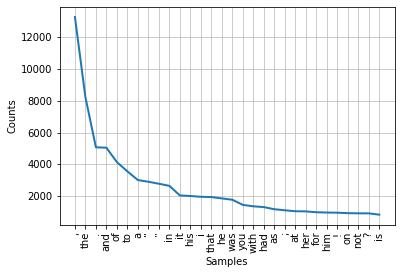

In [42]:
import matplotlib.pyplot as plt
fdist_1_o.plot(30,cumulative=False)
plt.show() #before pre processing - T1

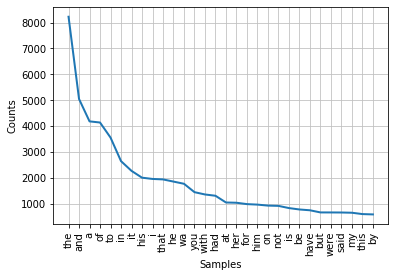

In [26]:
fdist_1.plot(30,cumulative=False)
plt.show() #after pre processing - T1

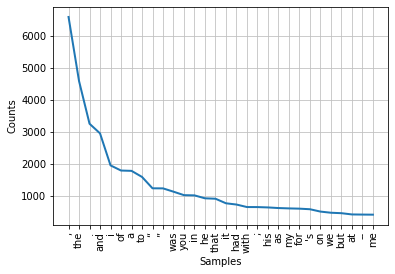

In [27]:
fdist_2_o.plot(30,cumulative=False)
plt.show() #before pre processing - T2

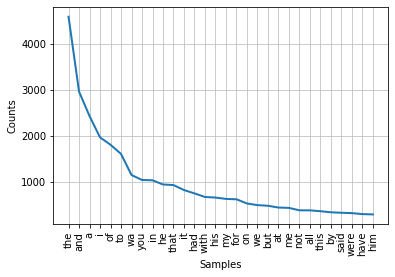

In [28]:
fdist_2.plot(30,cumulative=False)
plt.show() #after pre processing - T2

### 3.13 Removing Stopwords

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')
stop_words = set(stopwords.words("english"))

In [31]:
#Removing stopwords - T1
filtered_sent_1 = []
for w in words_1_without_punc:
    if w not in stop_words:
        filtered_sent_1.append(w)
#print("Tokenized Sentence:",words_1_without_punc)
#print("Filterd Sentence:",filtered_sent_1)


In [32]:
#Removing stopwords - T2
filtered_sent_2 = []
for w in words_2_without_punc:
    if w not in stop_words:
        filtered_sent_2.append(w)
#print("Tokenized Sentence:",words_2_without_punc)
#print("Filterd Sentence:",filtered_sent_2)


## 4. Word Cloud Formation

In [33]:
from wordcloud import WordCloud 

#Creating wordcloud

def generate_wordcloud(text,title):
    wordcloud = WordCloud(width = 3000,height = 2000,background_color ='white' ,stopwords = set()).generate_from_frequencies(FreqDist(text))
    fig = plt.figure()
    plt.axis("off")
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.title(title,{'fontsize': 24})
    plt.show()

def generate_treemap(text):

    df = pd.DataFrame(FreqDist(text).most_common(50),columns=['Cwords', 'count'])
    fig = px.treemap(df, path=['Cwords'], values='count')
    fig.show()



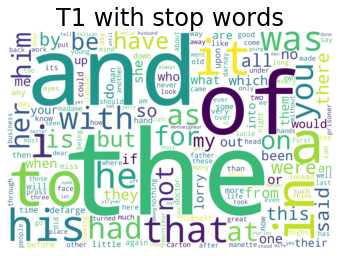

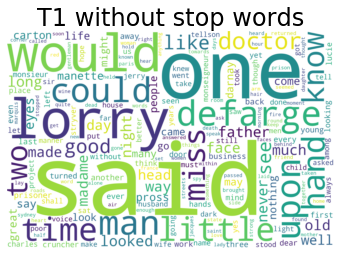

In [34]:
#T1

generate_wordcloud(words_1_without_punc,"T1 with stop words")  #original tokens 
generate_treemap(words_1_without_punc)
generate_wordcloud(filtered_sent_1,"T1 without stop words")   #filtered tokens - tokens with no stop words
generate_treemap(filtered_sent_1)

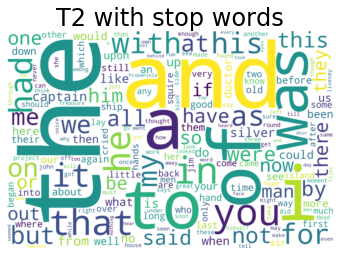

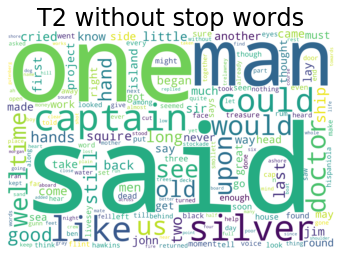

In [35]:
#T2 
generate_wordcloud(words_2_without_punc,"T2 with stop words")  #original tokens 
generate_treemap(words_2_without_punc)
generate_wordcloud(filtered_sent_2,"T2 without stop words")   #filtered tokens - tokens with no stop words
generate_treemap(filtered_sent_2)

In [36]:
clean_text_1 = pd.DataFrame(FreqDist(filtered_sent_1).most_common(50),
                             columns=['words from T1', 'count'])
clean_text_1.head(15)


words from T1  count
0           said    660
1            one    437
2          lorry    363
3          would    355
4        defarge    297
5           upon    290
6            man    289
7          could    288
8         little    266
9           time    258
10          hand    245
11          miss    233
12          know    226
13           two    214
14        doctor    214

In [37]:
clean_text_2 = pd.DataFrame(FreqDist(filtered_sent_2).most_common(50),
                             columns=['words from T2', 'count'])

clean_text_2.head(15)

words from T2  count
0           said    322
1            one    279
2            man    255
3        captain    235
4         silver    220
5           like    204
6          could    182
7          would    180
8         doctor    173
9             us    164
10          well    154
11          upon    154
12           see    142
13          time    131
14           old    123

(array([2.9723e+04, 5.8676e+04, 1.4741e+04, 1.9859e+04, 5.7610e+03,
        5.8280e+03, 1.6370e+03, 2.6800e+02, 1.0000e+02, 6.0000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <a list of 10 Patch objects>)

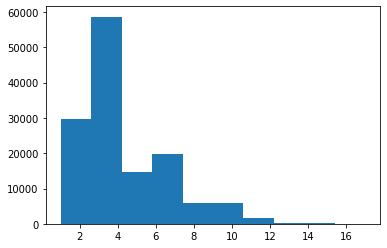

In [38]:
word_lengths_1 = [len(w) for w in words_1_without_punc]
plt.hist(word_lengths_1)

(array([1.5910e+04, 1.8618e+04, 2.1583e+04, 5.5750e+03, 6.2050e+03,
        1.3970e+03, 9.9600e+02, 1.0200e+02, 6.7000e+01, 6.0000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

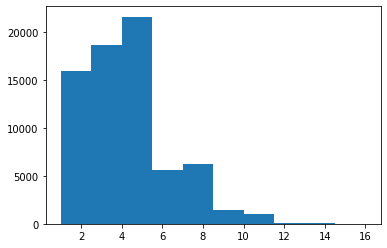

In [39]:
word_lengths_2 = [len(w) for w in words_2_without_punc]
plt.hist(word_lengths_2)

## 5. POS Tagging

In [40]:
#pos tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

tagged_tuple_1 = pos_tag(words_1_without_punc)
#print(tagged_tuple_1)
print(tagged_tuple_1[120:140])
tags_1 = [ t for (w,t) in tagged_tuple_1 ]
fdist = FreqDist(tags_1)
fdist.most_common(25)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ishita/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('the', 'DT'), ('period', 'NN'), ('the', 'DT'), ('mail', 'NN'), ('the', 'DT'), ('night', 'NN'), ('shadows', 'VBZ'), ('the', 'DT'), ('preparation', 'NN'), ('the', 'DT'), ('the', 'DT'), ('shoemaker', 'NN'), ('book', 'NN'), ('the', 'DT'), ('second', 'JJ'), ('the', 'DT'), ('golden', 'JJ'), ('thread', 'NN'), ('five', 'CD'), ('years', 'NNS')]


[('NN', 23744),
 ('IN', 18633),
 ('DT', 14693),
 ('JJ', 9803),
 ('VBD', 9125),
 ('PRP', 9087),
 ('RB', 7597),
 ('CC', 6218),
 ('NNS', 5339),
 ('VB', 5248),
 ('PRP$', 4525),
 ('VBN', 4208),
 ('TO', 3556),
 ('VBP', 2909),
 ('VBG', 2676),
 ('MD', 1800),
 ('VBZ', 1680),
 ('CD', 929),
 ('WRB', 836),
 ('WP', 833),
 ('WDT', 809),
 ('RP', 751),
 ('EX', 397),
 ('JJR', 392),
 ('JJS', 229)]

In [41]:
#pos tagging
from nltk.tag import pos_tag


tagged_tuple_2 = pos_tag(words_2_without_punc)
#print(tagged_tuple_2)
print(tagged_tuple_2[120:140])

tags_2 = [ t for (w,t) in tagged_tuple_2]
fdist = FreqDist(tags_2)
fdist.most_common(25)

[('hours', 'NNS'), ('and', 'CC'), ('with', 'IN'), ('the', 'DT'), ('kindest', 'JJS'), ('wishes', 'NNS'), ('dedicated', 'VBN'), ('by', 'IN'), ('his', 'PRP$'), ('affectionate', 'NN'), ('friend', 'VBP'), ('the', 'DT'), ('author', 'NN'), ('to', 'TO'), ('the', 'DT'), ('hesitating', 'VBG'), ('purchaser', 'NN'), ('if', 'IN'), ('sailor', 'JJ'), ('tales', 'NNS')]


[('NN', 12900),
 ('IN', 9001),
 ('DT', 8116),
 ('VBD', 5264),
 ('PRP', 4768),
 ('JJ', 4636),
 ('RB', 4397),
 ('CC', 3756),
 ('VB', 2744),
 ('NNS', 2415),
 ('VBN', 1832),
 ('PRP$', 1821),
 ('TO', 1602),
 ('VBP', 1550),
 ('VBG', 1191),
 ('MD', 889),
 ('VBZ', 701),
 ('CD', 594),
 ('RP', 478),
 ('WRB', 432),
 ('WP', 313),
 ('WDT', 283),
 ('EX', 197),
 ('JJR', 181),
 ('JJS', 132)]